<a href="https://colab.research.google.com/github/skondaparthi/FinSent-Agent/blob/main/FinSent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as datetime

In [2]:
datetime.datetime.now().isoformat()

'2025-07-24T17:27:40.830154'

In [3]:
# ingest/news_api.py
import requests
import pandas as pd

API_KEY = "b72b13eec06c4951b4049d799118efcb"

url = ('https://newsapi.org/v2/everything?'
       'q=stock%20market&'
       'from=2025-07-01&'
       'sortBy=popularity&'
       f'apiKey={API_KEY}')

response = requests.get(url)
data = response.json()

articles = pd.DataFrame([{
    "source": a["source"]["name"],
    "title": a["title"],
    "description": a["description"],
    "publishedAt": a["publishedAt"]
} for a in data["articles"]])

print(articles.head())


        source                                              title  \
0        Wired  Prime Day Picks From People Who Obsessively Te...   
1    The Verge  Wordpilled slangmaxxing: how incel language in...   
2    The Verge    The 177 best Prime Day 2025 deals that we found   
3  Gizmodo.com          The End of the Stock Market As We Know It   
4  Gizmodo.com  Wall Street’s AI Bubble Is Worse Than the 1999...   

                                         description           publishedAt  
0  We review products year-round and spend weeks ...  2025-07-09T09:12:33Z  
1  This excerpt from Adam Aleksic's Algospeak: Ho...  2025-07-07T20:12:17Z  
2  Prime Day, Amazon’s four-day thunderdome of ex...  2025-07-08T09:22:33Z  
3  Startups and Wall Street giants alike are raci...  2025-07-07T21:38:31Z  
4  A chief economist at investment giant Apollo s...  2025-07-17T13:00:10Z  


In [4]:
articles = articles.dropna()
articles

,source,title,description,publishedAt
0,Wired,Prime Day Picks From People Who Obsessively Te...,We review products year-round and spend weeks ...,2025-07-09T09:12:33Z
1,The Verge,Wordpilled slangmaxxing: how incel language in...,This excerpt from Adam Aleksic's Algospeak: Ho...,2025-07-07T20:12:17Z
2,The Verge,The 177 best Prime Day 2025 deals that we found,"Prime Day, Amazon’s four-day thunderdome of ex...",2025-07-08T09:22:33Z
3,Gizmodo.com,The End of the Stock Market As We Know It,Startups and Wall Street giants alike are raci...,2025-07-07T21:38:31Z
4,Gizmodo.com,Wall Street’s AI Bubble Is Worse Than the 1999...,A chief economist at investment giant Apollo s...,2025-07-17T13:00:10Z
...,...,...,...,...
95,Yahoo Entertainment,3 Oilfield Stocks Well Poised to Gain Despite ...,Strict capital discipline by upstream energy c...,2025-07-08T14:50:00Z
96,Yahoo Entertainment,Ford's Intensifying Recall Crisis: A Red Flag ...,F's escalating recall problems in 2025 are rai...,2025-07-08T13:49:00Z
97,Yahoo Entertainment,Morgan Stanley’s blunt challenge to GM CEO Mar...,Wall Street was unimpressed by General Motors’...,2025-07-23T12:23:47Z
98,Yahoo Entertainment,Exclusive-Russia's VTB to gain billions of rou...,"ST PETERSBURG, Russia (Reuters) -Every 1% cut ...",2025-07-04T13:18:53Z


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

def score(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    labels = ['negative', 'neutral', 'positive']
    return dict(zip(labels, scores[0].detach().numpy()))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

# Task
Perform sentiment analysis on the 'description' column of the `articles` DataFrame using the provided sentiment analysis model. Extract the negative, neutral, and positive scores into separate columns, determine the overall sentiment for each article, and then analyze and visualize the distribution of these overall sentiments.

## Apply sentiment scoring

### Subtask:
Apply the `score` function to the 'description' column of the `articles` DataFrame to get sentiment scores for each article.


In [6]:
articles["sent_scores"] = articles['description'].apply(score)

**Reasoning**:
Apply the sentiment scoring function to the 'description' column and store the results in a new column.



In [7]:
import numpy as np

for i in range(len(articles)):
  # Use .loc for assignment to avoid SettingWithCopyWarning
  articles.loc[articles.index[i], "category"] = max(articles.iloc[i]["sent_scores"], key=articles.iloc[i]["sent_scores"].get)

display(articles.head())

,source,title,description,publishedAt,sent_scores,category
0,Wired,Prime Day Picks From People Who Obsessively Te...,We review products year-round and spend weeks ...,2025-07-09T09:12:33Z,"{'negative': 0.083599545, 'neutral': 0.0199131...",positive
1,The Verge,Wordpilled slangmaxxing: how incel language in...,This excerpt from Adam Aleksic's Algospeak: Ho...,2025-07-07T20:12:17Z,"{'negative': 0.026791913, 'neutral': 0.0514477...",positive
2,The Verge,The 177 best Prime Day 2025 deals that we found,"Prime Day, Amazon’s four-day thunderdome of ex...",2025-07-08T09:22:33Z,"{'negative': 0.29194984, 'neutral': 0.01464682...",positive
3,Gizmodo.com,The End of the Stock Market As We Know It,Startups and Wall Street giants alike are raci...,2025-07-07T21:38:31Z,"{'negative': 0.05094614, 'neutral': 0.01903924...",positive
4,Gizmodo.com,Wall Street’s AI Bubble Is Worse Than the 1999...,A chief economist at investment giant Apollo s...,2025-07-17T13:00:10Z,"{'negative': 0.025278883, 'neutral': 0.7703285...",neutral


In [8]:
articles

,source,title,description,publishedAt,sent_scores,category
0,Wired,Prime Day Picks From People Who Obsessively Te...,We review products year-round and spend weeks ...,2025-07-09T09:12:33Z,"{'negative': 0.083599545, 'neutral': 0.0199131...",positive
1,The Verge,Wordpilled slangmaxxing: how incel language in...,This excerpt from Adam Aleksic's Algospeak: Ho...,2025-07-07T20:12:17Z,"{'negative': 0.026791913, 'neutral': 0.0514477...",positive
2,The Verge,The 177 best Prime Day 2025 deals that we found,"Prime Day, Amazon’s four-day thunderdome of ex...",2025-07-08T09:22:33Z,"{'negative': 0.29194984, 'neutral': 0.01464682...",positive
3,Gizmodo.com,The End of the Stock Market As We Know It,Startups and Wall Street giants alike are raci...,2025-07-07T21:38:31Z,"{'negative': 0.05094614, 'neutral': 0.01903924...",positive
4,Gizmodo.com,Wall Street’s AI Bubble Is Worse Than the 1999...,A chief economist at investment giant Apollo s...,2025-07-17T13:00:10Z,"{'negative': 0.025278883, 'neutral': 0.7703285...",neutral
...,...,...,...,...,...,...
95,Yahoo Entertainment,3 Oilfield Stocks Well Poised to Gain Despite ...,Strict capital discipline by upstream energy c...,2025-07-08T14:50:00Z,"{'negative': 0.009821772, 'neutral': 0.9605832...",neutral
96,Yahoo Entertainment,Ford's Intensifying Recall Crisis: A Red Flag ...,F's escalating recall problems in 2025 are rai...,2025-07-08T13:49:00Z,"{'negative': 0.03176469, 'neutral': 0.9475499,...",neutral
97,Yahoo Entertainment,Morgan Stanley’s blunt challenge to GM CEO Mar...,Wall Street was unimpressed by General Motors’...,2025-07-23T12:23:47Z,"{'negative': 0.03659338, 'neutral': 0.9396461,...",neutral
98,Yahoo Entertainment,Exclusive-Russia's VTB to gain billions of rou...,"ST PETERSBURG, Russia (Reuters) -Every 1% cut ...",2025-07-04T13:18:53Z,"{'negative': 0.9265875, 'neutral': 0.019567862...",negative


<BarContainer object of 3 artists>

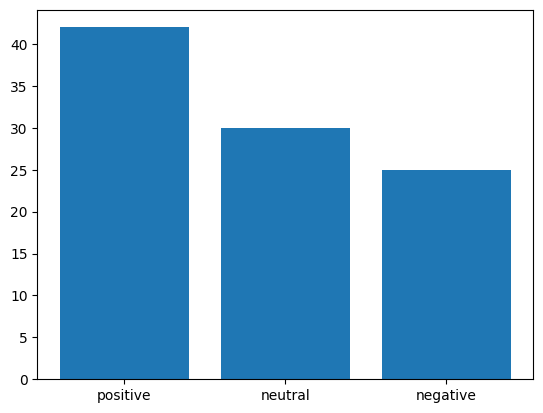

In [15]:
import matplotlib.pyplot as plt

plt.bar(articles["category"].value_counts().index, articles['category'].value_counts().values)